In [61]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from numpy import random as rd
import numpy as np
import pandas as pd
from sklearn.manifold import SpectralEmbedding
import math
import networkx as nx
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

In [4]:
x=np.random.random(3)
print(x)

[0.01138395 0.54358558 0.46642221]


[[ -8.58285572   8.2770773 ]
 [ -9.58401514   9.87834996]
 [ -2.71124537   8.81123033]
 [-10.04340228   9.08840078]
 [ -8.79494729   7.10434869]]
[3 5 0 5 3]


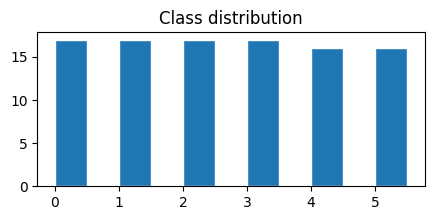

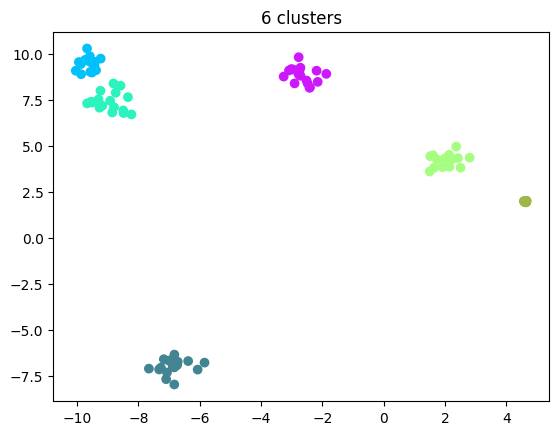

In [104]:
# create clusters
k = 6
c_std = []
np.random.seed(2)
for i in range(k):
    c_std.append(np.random.rand())
x, y = make_blobs(n_samples=100, centers=k, n_features=2, cluster_std=c_std,
                  random_state=42)
print(x[:5]) # coordinates
print(y[:5]) # class labels

# random color generation
random.seed(0)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

colors_name = []
for l in y:
    colors_name.append(colors[l])
colors_name[:5]    

colors_name = []
for l in y:
    colors_name.append(colors[l])
colors_name[:5]  

plt.figure(figsize=(5,2))
plt.hist(y, bins=np.arange(0,6,0.5), edgecolor='white')
plt.title('Class distribution')
plt.show()

df = pd.DataFrame(x)
plt.scatter(df[0], df[1], color=colors_name)
plt.title(f'{k} clusters')
plt.show()

In [105]:
math.dist(x[0], x[1])

1.8884899558960857

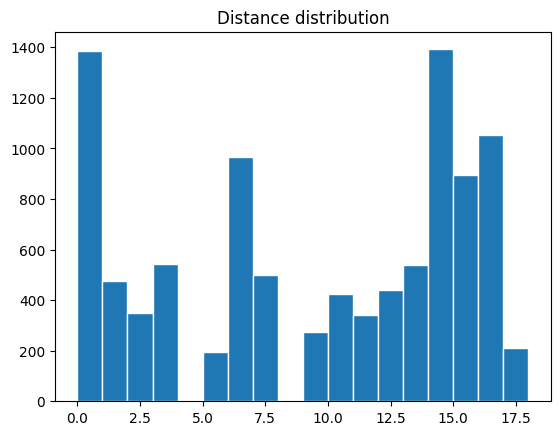

18.4898 0.0


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.00000,1.88849,5.89586,1.67076,1.19175,15.67156,14.66421,14.63941,14.63030,5.84371,...,1.24581,14.62599,15.12921,16.34403,1.35236,6.74300,1.38264,6.07405,14.66232,14.63237
1,1.88849,0.00000,6.95512,0.91381,2.88404,17.38249,16.28934,16.26450,16.25254,6.88467,...,2.72525,16.24927,16.86054,18.06227,3.14561,7.77365,2.81895,7.19208,16.28469,16.25790
2,5.89586,6.95512,0.00000,7.33739,6.31861,16.71027,10.05808,10.03402,10.01156,0.09663,...,6.66976,10.01242,16.05554,17.28162,6.08176,0.84754,6.78371,0.32419,10.04302,10.02938
3,1.67076,0.91381,7.33739,0.00000,2.34416,16.67706,16.33215,16.30733,16.29793,7.27511,...,2.09189,16.29372,16.17087,17.36113,2.65887,8.17504,2.15514,7.54733,16.32997,16.30034
4,1.19175,2.88404,6.31861,2.34416,0.00000,14.52844,14.39609,14.37148,14.36607,6.28214,...,0.39238,14.36044,13.99610,15.20456,0.34901,7.15779,0.47537,6.44482,14.39775,14.36390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.74300,7.77365,0.84754,8.17504,7.15779,17.04862,9.53606,9.51246,9.48725,0.90135,...,7.51164,9.48928,16.38566,17.60146,6.91575,0.00000,7.62442,0.73991,9.51818,9.50843
96,1.38264,2.81895,6.78371,2.15514,0.47537,14.56543,14.83080,14.80623,14.80144,6.74585,...,0.13945,14.79560,14.04750,15.24617,0.78981,7.62442,0.00000,6.91386,14.83304,14.79858
97,6.07405,7.19208,0.32419,7.54733,6.44482,16.51424,9.73879,9.71468,9.69246,0.42080,...,6.80354,9.69323,15.85659,17.07956,6.19591,0.73991,6.91386,0.00000,9.72396,9.71000
98,14.66232,16.28469,10.04302,16.32997,14.39775,14.98445,0.04440,0.04870,0.03217,10.13846,...,14.78525,0.03881,14.34799,15.21685,14.05379,9.51818,14.83304,9.72396,0.00000,0.05818


In [107]:
# adj matrix constructed based on Gaussian matrix
gaussian_weights = []
for i in range(100):
    for j in range(100):
        gaussian_weights.append(round(math.exp(-math.pow(math.dist(x[i], x[j]),2)), 5))

G = np.array(gaussian_weights).reshape(100,100)
G = pd.DataFrame(G)

weights = []
for i in range(100):
    for j in range(100):
        weights.append(round(math.dist(x[i], x[j]),5))

plt.hist(weights, bins=np.arange(0,19,1), edgecolor='white')
plt.title('Distance distribution')
plt.show()

W = np.array(weights).reshape(100,100)
W = pd.DataFrame(W)
print(W.max().max(), W.min().min())
W

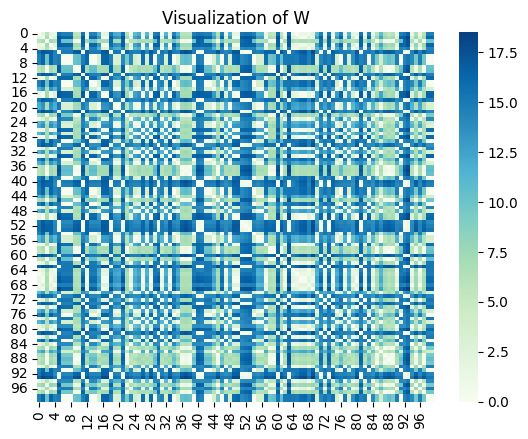

In [108]:
sns.heatmap(W, cmap=plt.cm.GnBu)
plt.title('Visualization of W')
plt.show() # quite sparse!

[-2.32529456e-16  1.00000567e+00  1.00000638e+00  1.00000650e+00
  1.00000680e+00]
100 100


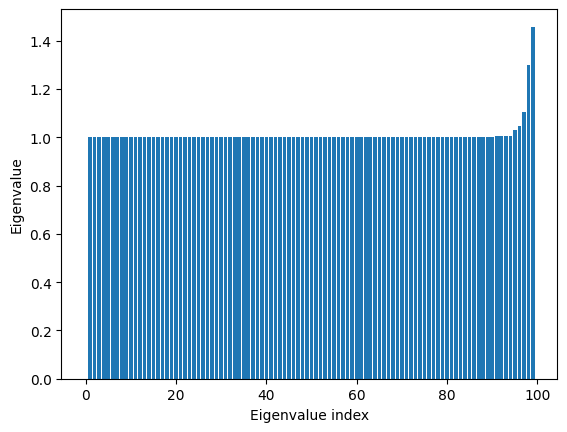

[-4.84496398e-25  7.66303521e+02  7.67665198e+02  7.69685951e+02
  7.73575243e+02]
100 100


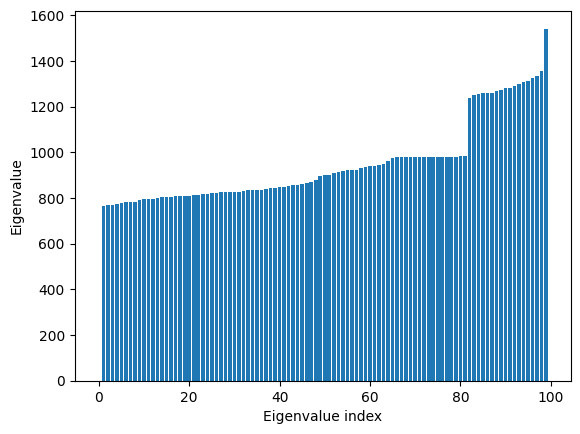

In [162]:
G = nx.from_pandas_adjacency(W)
L = nx.laplacian_matrix(G)

L_spectrum = nx.normalized_laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
print(len(L_spectrum), len(np.array(np.unique(L_spectrum)))) # multiplicity check
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show() # normalization leads to the degeneracy of eigenvalues

L_spectrum = nx.laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
print(len(L_spectrum), len(np.array(np.unique(L_spectrum)))) # multiplicity check
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show() 

In [160]:
L = L.toarray()
pd.DataFrame(L)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,837.59773,-1.88849,-5.89586,-1.67076,-1.19175,-15.67156,-14.66421,-14.63941,-14.63030,-5.84371,...,-1.24581,-14.62599,-15.12921,-16.34403,-1.35236,-6.74300,-1.38264,-6.07405,-14.66232,-14.63237
1,-1.88849,946.12288,-6.95512,-0.91381,-2.88404,-17.38249,-16.28934,-16.26450,-16.25254,-6.88467,...,-2.72525,-16.24927,-16.86054,-18.06227,-3.14561,-7.77365,-2.81895,-7.19208,-16.28469,-16.25790
2,-5.89586,-6.95512,782.95321,-7.33739,-6.31861,-16.71027,-10.05808,-10.03402,-10.01156,-0.09663,...,-6.66976,-10.01242,-16.05554,-17.28162,-6.08176,-0.84754,-6.78371,-0.32419,-10.04302,-10.02938
3,-1.67076,-0.91381,-7.33739,936.15164,-2.34416,-16.67706,-16.33215,-16.30733,-16.29793,-7.27511,...,-2.09189,-16.29372,-16.17087,-17.36113,-2.65887,-8.17504,-2.15514,-7.54733,-16.32997,-16.30034
4,-1.19175,-2.88404,-6.31861,-2.34416,826.25319,-14.52844,-14.39609,-14.37148,-14.36607,-6.28214,...,-0.39238,-14.36044,-13.99610,-15.20456,-0.34901,-7.15779,-0.47537,-6.44482,-14.39775,-14.36390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-6.74300,-7.77365,-0.84754,-8.17504,-7.15779,-17.04862,-9.53606,-9.51246,-9.48725,-0.90135,...,-7.51164,-9.48928,-16.38566,-17.60146,-6.91575,806.01444,-7.62442,-0.73991,-9.51818,-9.50843
96,-1.38264,-2.81895,-6.78371,-2.15514,-0.47537,-14.56543,-14.83080,-14.80623,-14.80144,-6.74585,...,-0.13945,-14.79560,-14.04750,-15.24617,-0.78981,-7.62442,848.81737,-6.91386,-14.83304,-14.79858
97,-6.07405,-7.19208,-0.32419,-7.54733,-6.44482,-16.51424,-9.73879,-9.71468,-9.69246,-0.42080,...,-6.80354,-9.69323,-15.85659,-17.07956,-6.19591,-0.73991,-6.91386,776.07826,-9.72396,-9.71000
98,-14.66232,-16.28469,-10.04302,-16.32997,-14.39775,-14.98445,-0.04440,-0.04870,-0.03217,-10.13846,...,-14.78525,-0.03881,-14.34799,-15.21685,-14.05379,-9.51818,-14.83304,-9.72396,982.08196,-0.05818


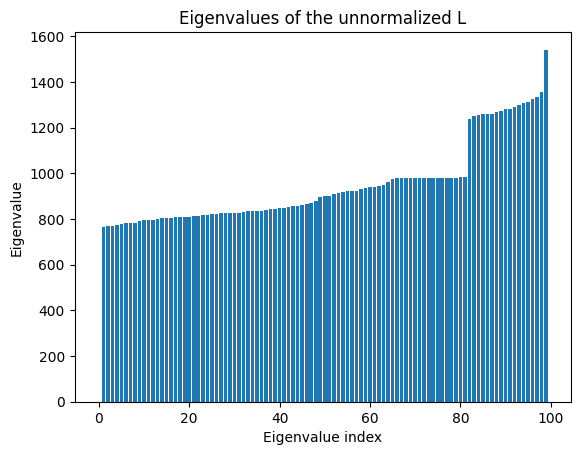

smallest : [2.0538429912847938e-13, 766.3035211985477, 767.6651978961586]
largest : [1336.0477582276728, 1355.0259797874053, 1541.3209264170105]
# of unique eigenvalues : 100 out of 100


In [161]:
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eigh(L)

# plt.bar(range(len(L_value)), sorted(L_value))
plt.bar(range(len(L_value)), L_value)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the unnormalized L')
plt.show()

print('smallest :', sorted(L_value)[:3])
print('largest :', sorted(L_value)[-3:])
print('# of unique eigenvalues :', len(np.array(np.unique(L_value))), 'out of', len(L_value), ) # multiplicity check
# both give the same results

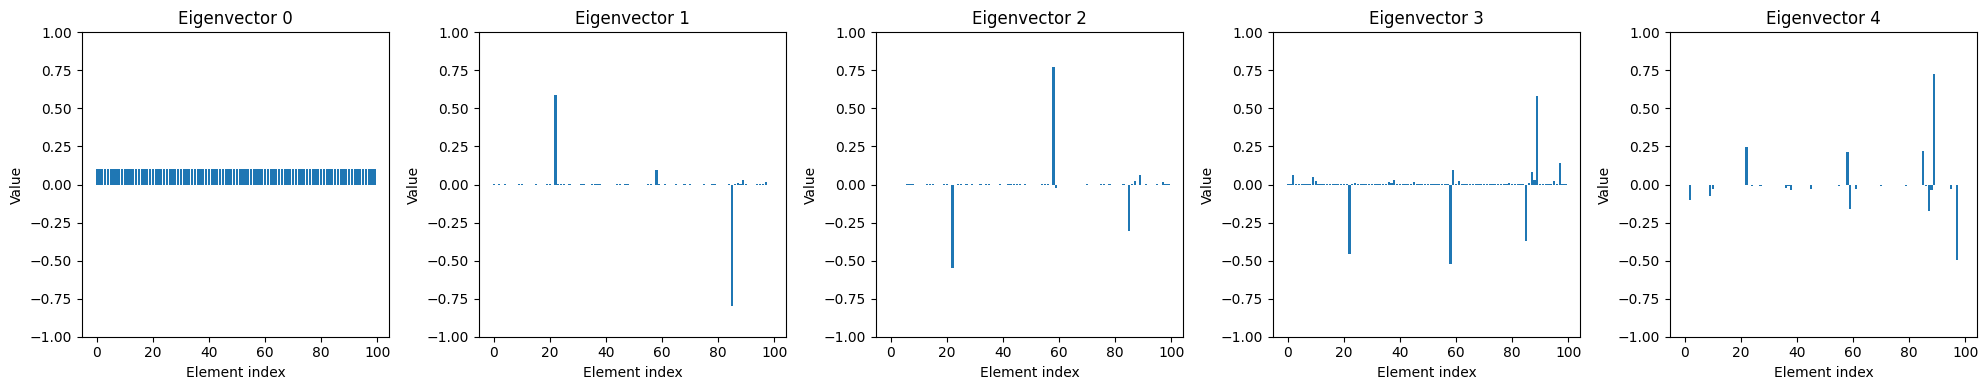

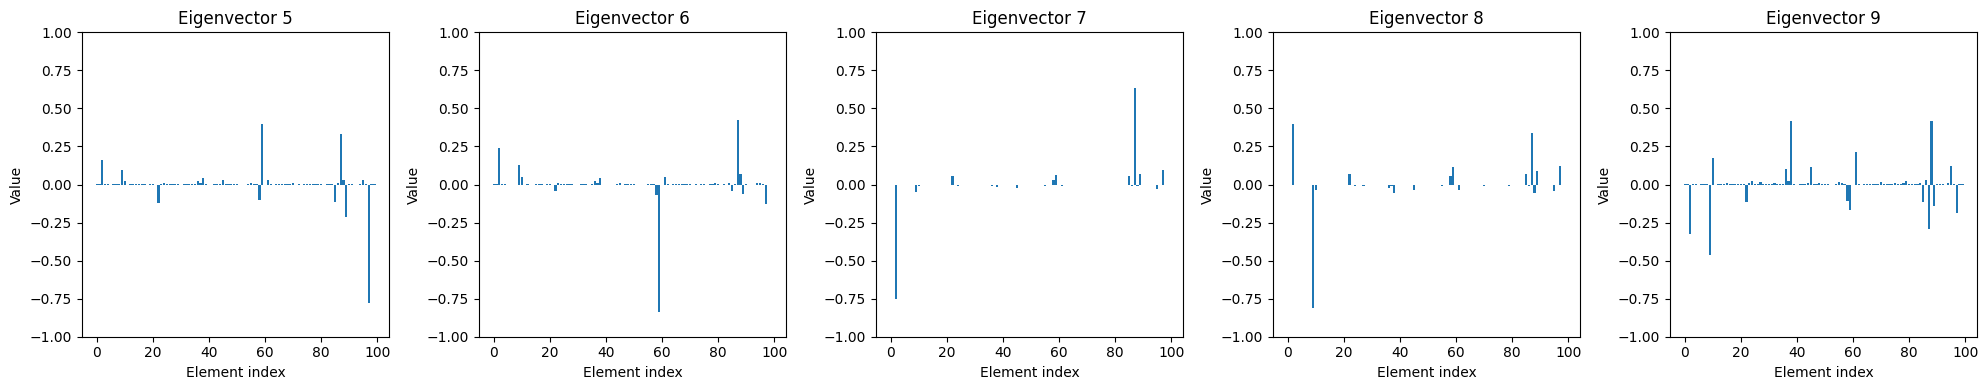

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [165]:
# eigenvector
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        # axes[col].scatter(x, temp_vector)
        axes[col].bar(range(len(temp_vector)), temp_vector)
        axes[col].set_ylim(-1,1)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

print(L_vector[:,0]) # constant vector

[0.43599490214200376, 0.025926231827891333, 0.5496624778787091, 0.4353223926182769, 0.42036780208748903, 0.3303348210038741]


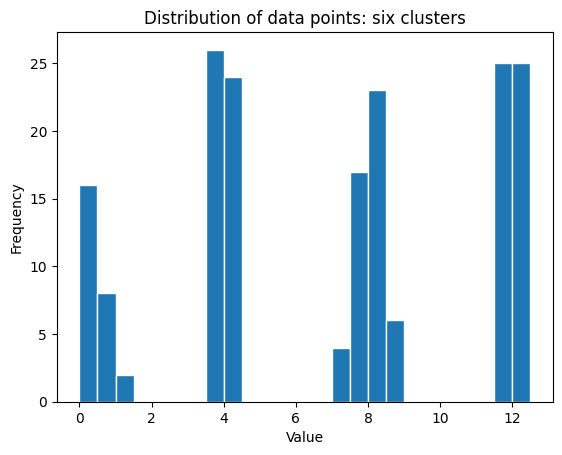

In [196]:
# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x = []
np.random.seed(10)
for i in range(50):
    x.append(round(rd.normal(loc=0, scale=c_std[0]),5))
    x.append(round(rd.normal(loc=4, scale=c_std[1]),5))
    x.append(round(rd.normal(loc=8, scale=c_std[0]),5))
    x.append(round(rd.normal(loc=12, scale=c_std[1]),5))

print(c_std)

plt.hist(x, bins=np.arange(0, 13, 0.5), edgecolor='white')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of data points: six clusters')
plt.show()

In [197]:
# To calculate weights according to the Gaussian similarity function
# transversing the upper triangular part of x_df is just enought
gaussian_weights = []
for i in range(200):
    for j in range(200):
        gaussian_weights.append(round(math.exp(-math.pow(x[i]-x[j],2)),5))
# for i in range(100):
#     gaussian_weights[101*i] = 0
W = np.array(gaussian_weights).reshape(200,200)
W = pd.DataFrame(W)
W

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.00000,0.00001,0.00000,0.00000,0.90856,0.00001,0.00000,0.00000,0.71542,0.00001,...,0.00000,0.00000,0.33113,0.00001,0.00000,0.00000,0.97229,0.00001,0.00000,0.00000
1,0.00001,1.00000,0.00002,0.00000,0.00000,0.99862,0.00000,0.00000,0.00000,0.99947,...,0.00000,0.00000,0.00000,0.99953,0.00000,0.00000,0.00000,0.99797,0.00000,0.00000
2,0.00000,0.00002,1.00000,0.00000,0.00000,0.00001,0.53612,0.00000,0.00000,0.00002,...,0.50388,0.00000,0.00000,0.00002,0.77621,0.00000,0.00000,0.00001,0.24692,0.00000
3,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.99999,0.00000,0.00000,...,0.00000,0.99997,0.00000,0.00000,0.00000,0.99893,0.00000,0.00000,0.00001,0.99979
4,0.90856,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.93018,0.00000,...,0.00000,0.00000,0.57693,0.00000,0.00000,0.00000,0.98003,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00000,0.00000,0.00000,0.99893,0.00000,0.00000,0.00000,0.99912,0.00000,0.00000,...,0.00000,0.99856,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.99776
196,0.97229,0.00000,0.00000,0.00000,0.98003,0.00000,0.00000,0.00000,0.84453,0.00000,...,0.00000,0.00000,0.45800,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
197,0.00001,0.99797,0.00001,0.00000,0.00000,0.99994,0.00000,0.00000,0.00000,0.99952,...,0.00000,0.00000,0.00000,0.99946,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
198,0.00000,0.00000,0.24692,0.00001,0.00000,0.00000,0.85681,0.00000,0.00000,0.00000,...,0.88174,0.00001,0.00000,0.00000,0.63033,0.00000,0.00000,0.00000,1.00000,0.00001


[-7.32223178e-15  6.58454466e-05  2.70202521e-04  1.18520145e-03
  1.69419218e+01]
200 200


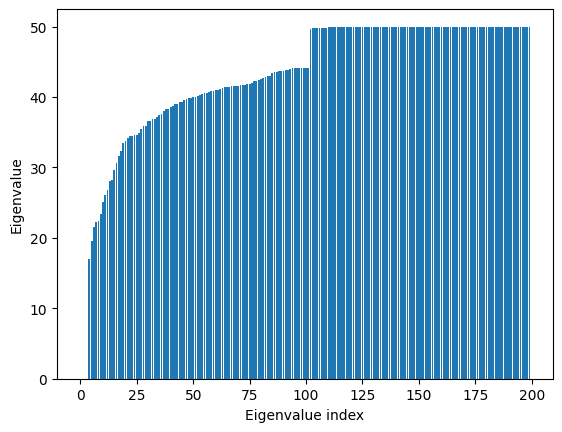

In [198]:
G = nx.from_pandas_adjacency(W)
L = nx.laplacian_matrix(G)
L = L.toarray()

L_spectrum = nx.laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
print(len(L_spectrum), len(np.array(np.unique(L_spectrum)))) # multiplicity check
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show() 

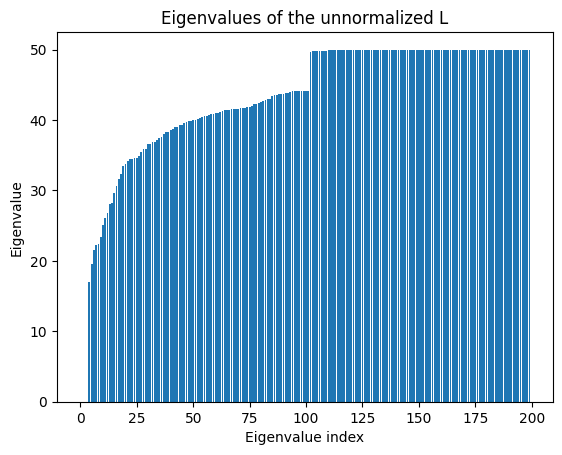

smallest : [-9.344815962038991e-15, 6.584544656078014e-05, 0.0002702025212596804]
largest : [49.97218582982287, 49.972245150269444, 49.972296328568206]
# of unique eigenvalues : 200 out of 200


In [200]:
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eigh(L)

plt.bar(range(len(L_value)), L_value)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the unnormalized L')
plt.show()

print('smallest :', sorted(L_value)[:3])
print('largest :', sorted(L_value)[-3:])
print('# of unique eigenvalues :', len(np.array(np.unique(L_value))), 'out of', len(L_value), ) # multiplicity check

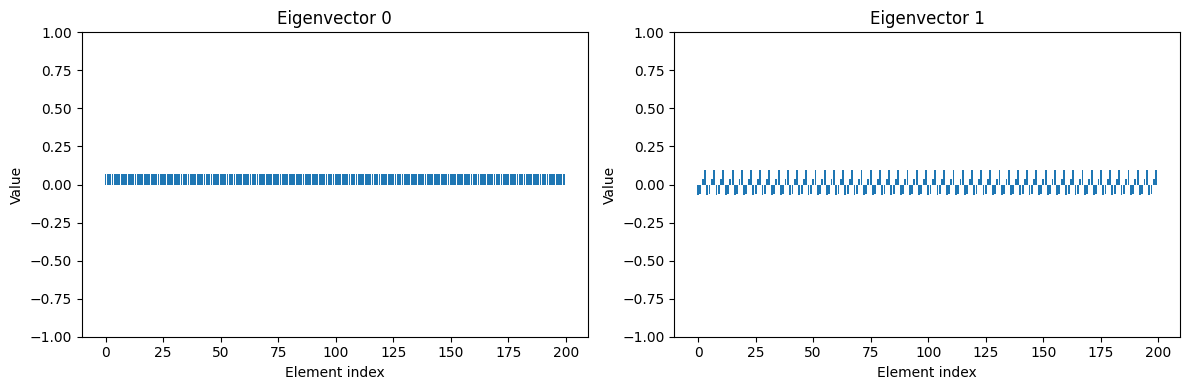

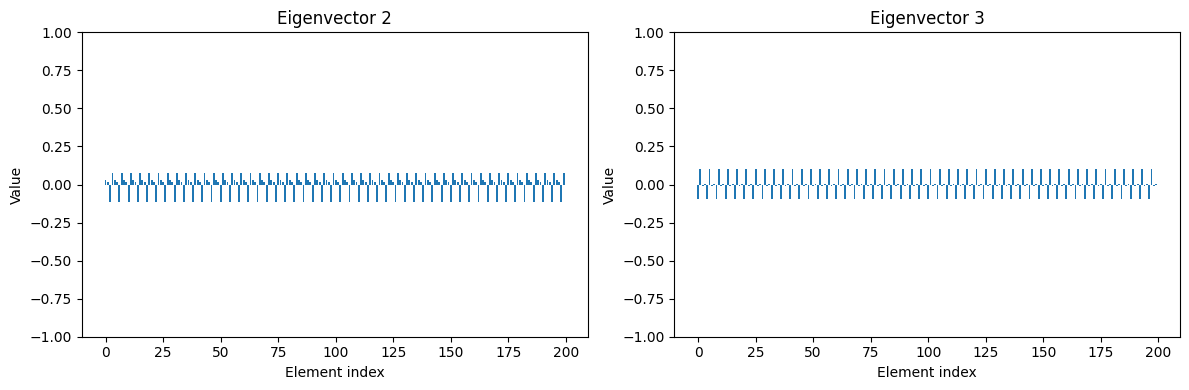

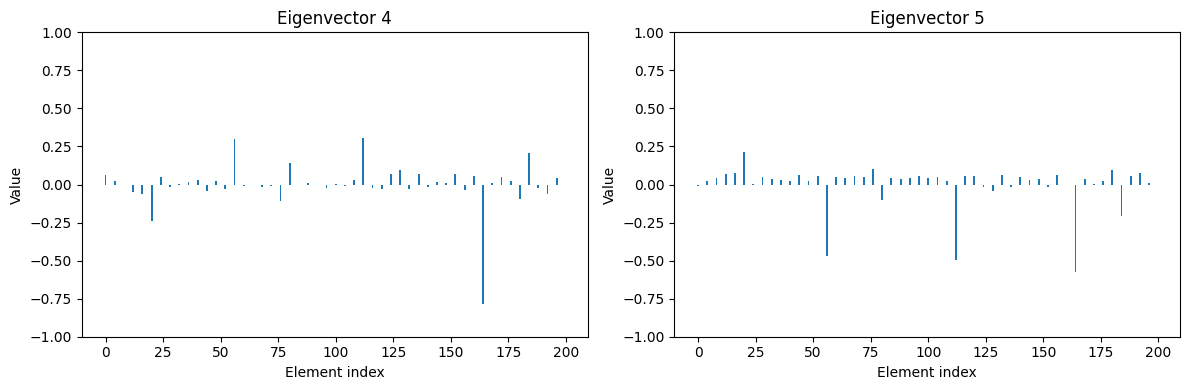

[0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068
 0.07071068 0.07071068 0.07071068 0.07071068 0.07071068 0.0707

In [201]:
# eigenvector
plots_per_row = 2
total_plots = 6

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(12, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        # axes[col].scatter(x, temp_vector)
        axes[col].bar(range(len(temp_vector)), temp_vector)
        axes[col].set_ylim(-1,1)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

print(L_vector[:,0]) # constant vector

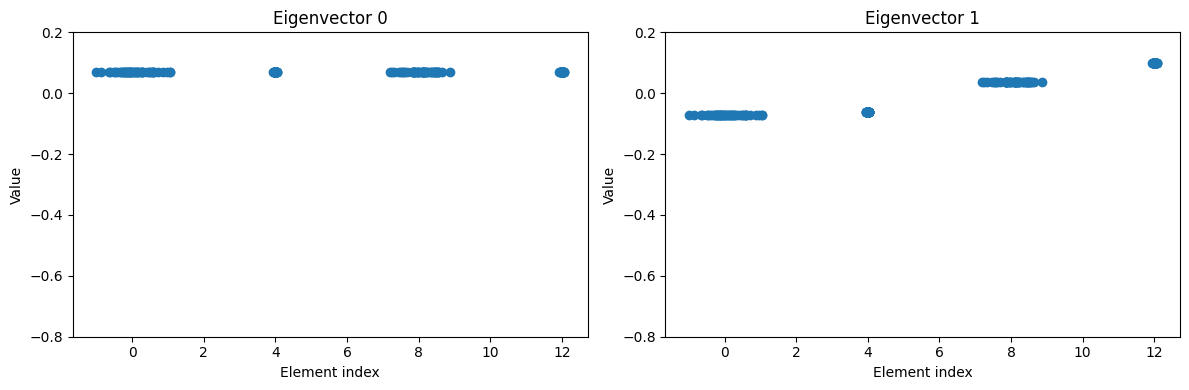

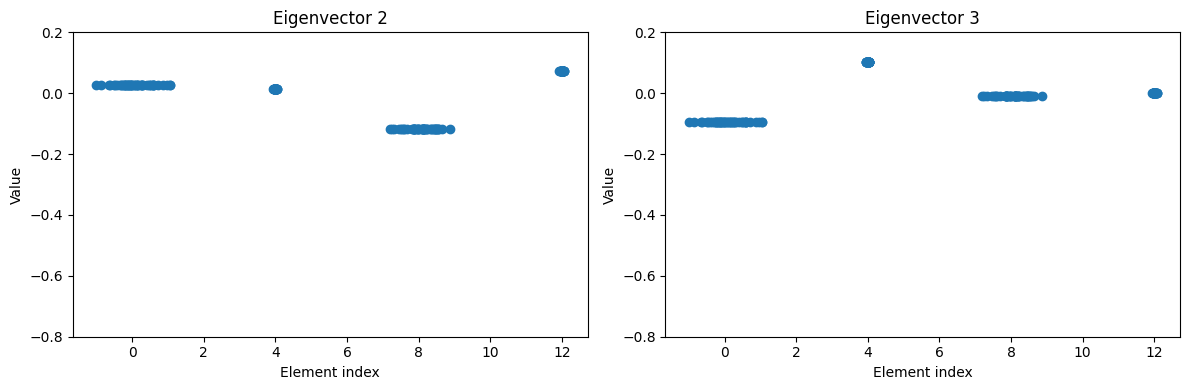

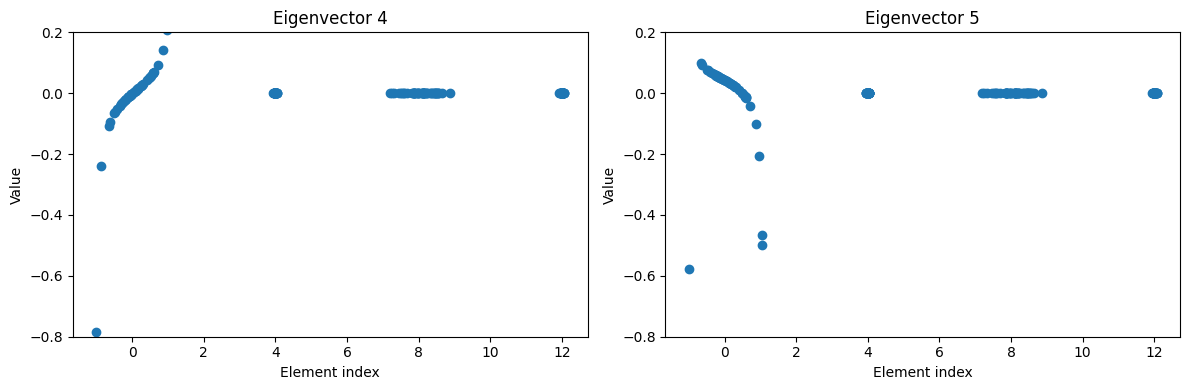

In [220]:
# eigenvector with a different x-axis
plots_per_row = 2
total_plots = 6

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(12, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        axes[col].scatter(x, temp_vector)
        # axes[col].bar(range(len(temp_vector)), temp_vector)
        axes[col].set_ylim(-0.8,0.2)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

# print(L_vector[:,0]) # constant vector

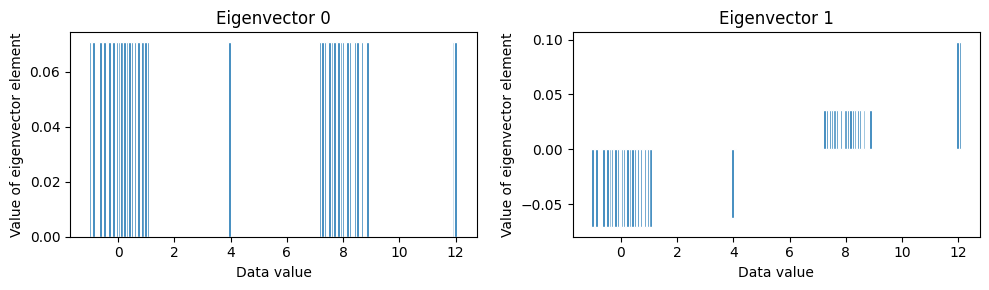

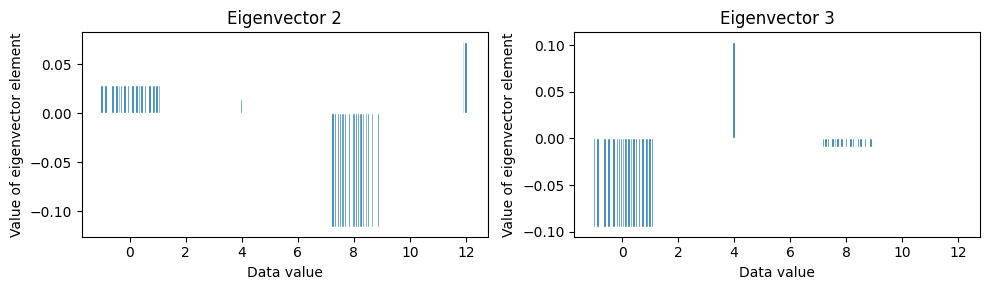

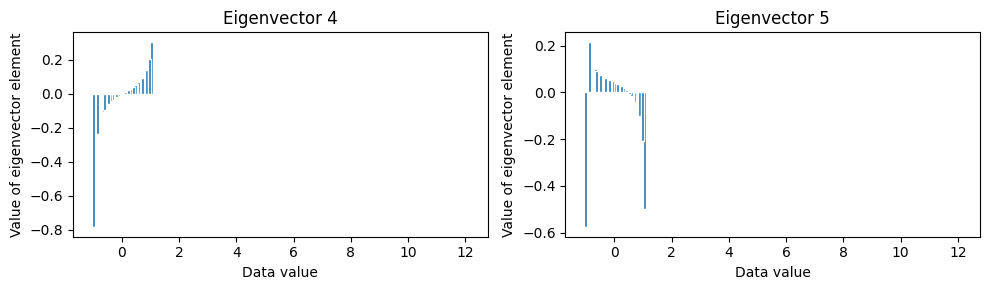

In [230]:
# eigenvector with a different x-axis
plots_per_row = 2
total_plots = 6

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(10, 3))
    plt.tight_layout()
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        axes[col].bar(x, temp_vector, edgecolor='white', width=0.1)
        axes[col].axhline(y=0, color='gray', linestyle='--')
        # axes[col].fill_between(x, temp_vector, color='skyblue', alpha=0.5) # needs sorting beforehand
        # axes[col].bar(range(len(temp_vector)), temp_vector)
        # axes[col].set_ylim(-0.8,0.2)
        axes[col].set_xlabel('Data value')
        axes[col].set_ylabel('Value of eigenvector element')
        axes[col].set_title(f'Eigenvector {run_number-1}')
        
    fig.savefig(f'figure/eigenVectors_{k}_{run_number}.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# print(L_vector[:,0]) # constant vector

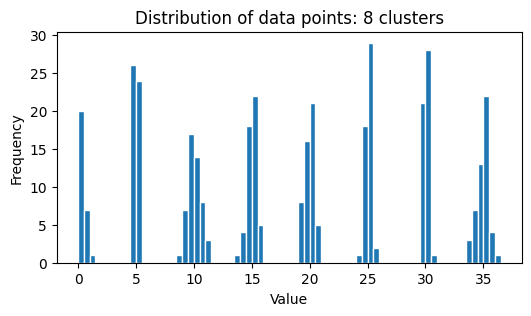

In [251]:
# create clusters
k = 8
num = 50*k
c_std = []
np.random.seed(2)
for i in range(k):
    c_std.append(np.random.rand())

# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x = []
k_index = 0
np.random.seed(10)
for j in range(k):
    for i in range(50):
        x.append(round(rd.normal(loc=5*j, scale=c_std[j]),5))

figure = plt.figure(figsize=(6,3))
plt.hist(x, bins=np.arange(0, 37, 0.5), edgecolor='white')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of data points: {k} clusters')
plt.show()

In [253]:
gaussian_weights = []
for i in range(num):
    for j in range(num):
        gaussian_weights.append(round(math.exp(-math.pow(x[i]-x[j],2)),5))
        
W = np.array(gaussian_weights).reshape(num,num)
W = pd.DataFrame(W)
W

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.00000,0.93035,0.20734,0.71084,0.90856,0.44926,0.80570,0.75252,0.71542,0.64971,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.93035,1.00000,0.37851,0.90524,0.99832,0.67595,0.96227,0.93242,0.90838,0.86025,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.20734,0.37851,1.00000,0.63822,0.40966,0.87855,0.53612,0.59451,0.63349,0.69963,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.71084,0.90524,0.63822,1.00000,0.92739,0.90821,0.98584,0.99740,0.99997,0.99476,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.90856,0.99832,0.40966,0.92739,1.00000,0.71031,0.97622,0.95125,0.93018,0.88655,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.87969,0.72275,0.94258,0.90277,0.96607,1.00000,0.27495,0.16654,0.64423,0.69421
396,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.54570,0.72550,0.45038,0.51345,0.40516,0.27495,1.00000,0.95980,0.79939,0.75338
397,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.38213,0.55356,0.30105,0.35403,0.26460,0.16654,0.95980,1.00000,0.63342,0.58287
398,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.91113,0.99134,0.83833,0.88884,0.79626,0.64423,0.79939,0.63342,1.00000,0.99653


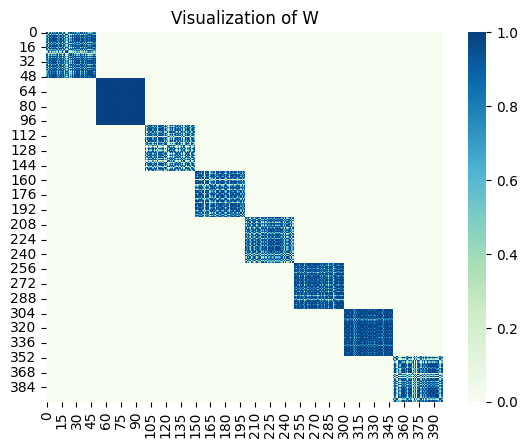

In [255]:
# adj matrix as a heatmap
sns.heatmap(pd.DataFrame(W), cmap=plt.cm.GnBu)
plt.title('Visualization of W')
plt.show() # block diagonal ~ clusters

[-9.64775252e-26  1.46913107e-15  7.10542736e-15  1.42108547e-14
  1.90141181e-14]
400 400


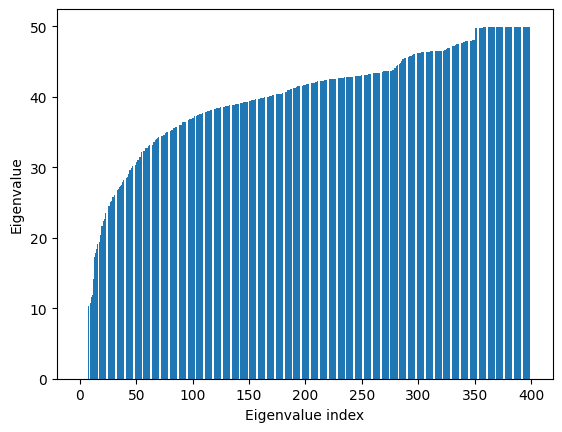

In [256]:
G = nx.from_pandas_adjacency(W)
L = nx.laplacian_matrix(G)
L = L.toarray()

L_spectrum = nx.laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
print(len(L_spectrum), len(np.array(np.unique(L_spectrum)))) # multiplicity check
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show() 

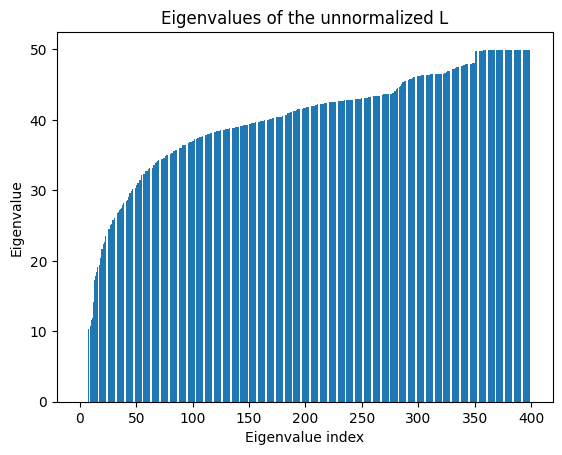

smallest : [-7.41552777963721e-15, -7.019094554758626e-16, 5.759578071300185e-15]
largest : [49.96409108592363, 49.96420067354028, 49.9643981880575]
# of unique eigenvalues : 400 out of 400


In [257]:
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eigh(L)

plt.bar(range(len(L_value)), L_value)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the unnormalized L')
plt.show()

print('smallest :', sorted(L_value)[:3])
print('largest :', sorted(L_value)[-3:])
print('# of unique eigenvalues :', len(np.array(np.unique(L_value))), 'out of', len(L_value), ) # multiplicity check

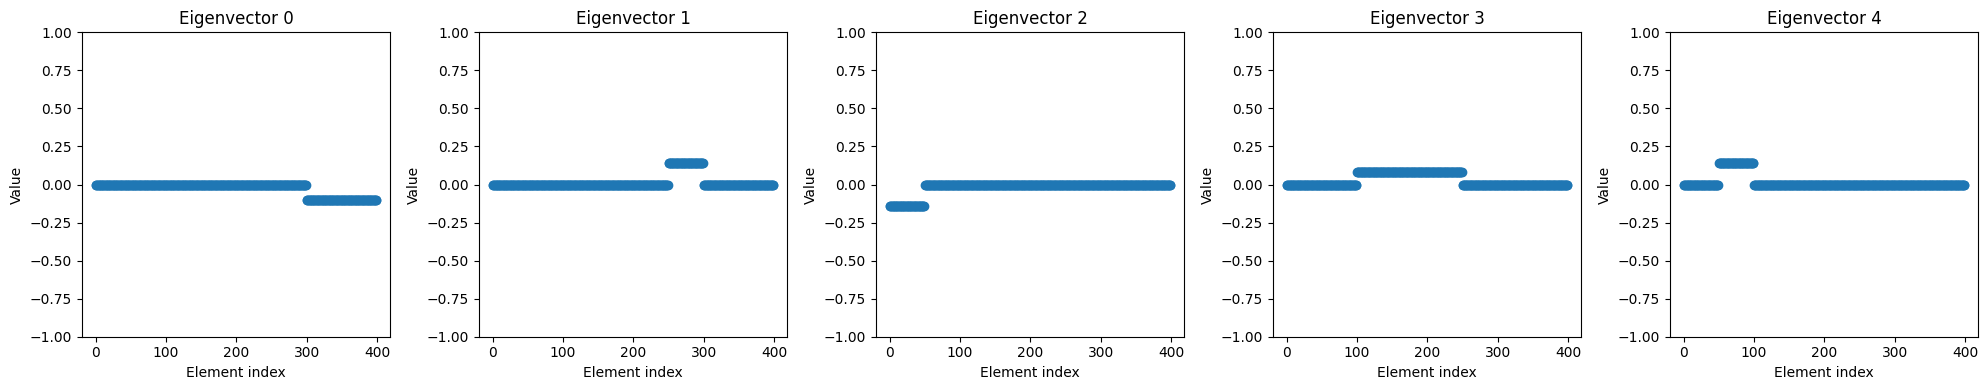

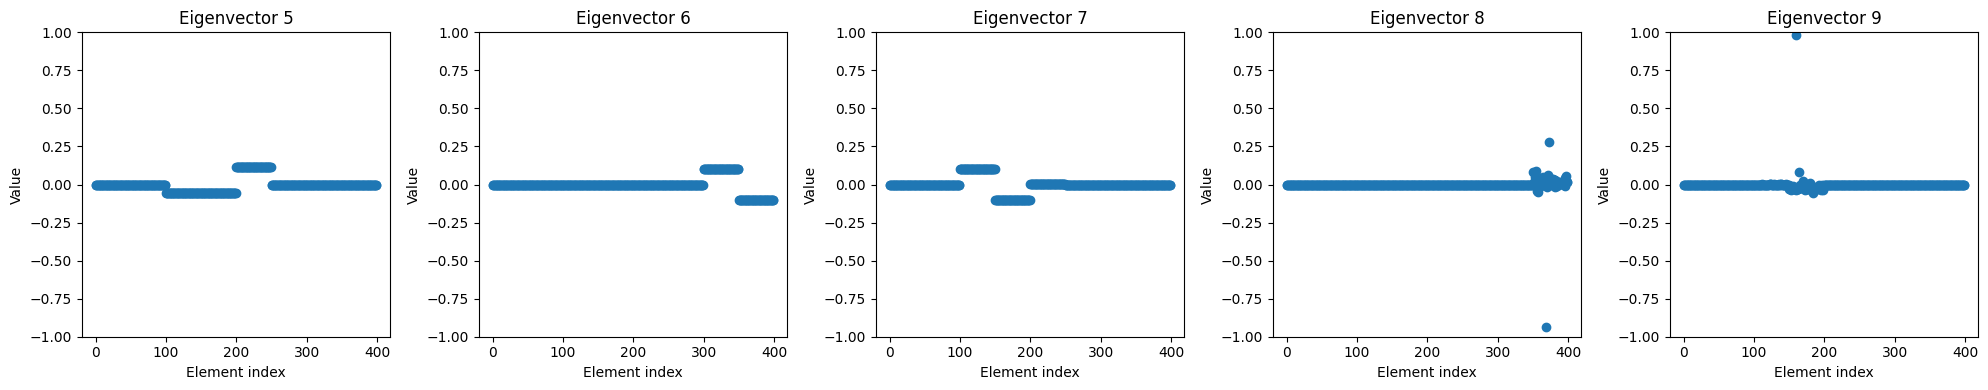

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. 

In [277]:
# eigenvector
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        # axes[col].scatter(x, temp_vector)
        axes[col].scatter(range(len(temp_vector)), temp_vector)
        axes[col].set_ylim(-1,1)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

print(L_vector[:,0]) # constant vector

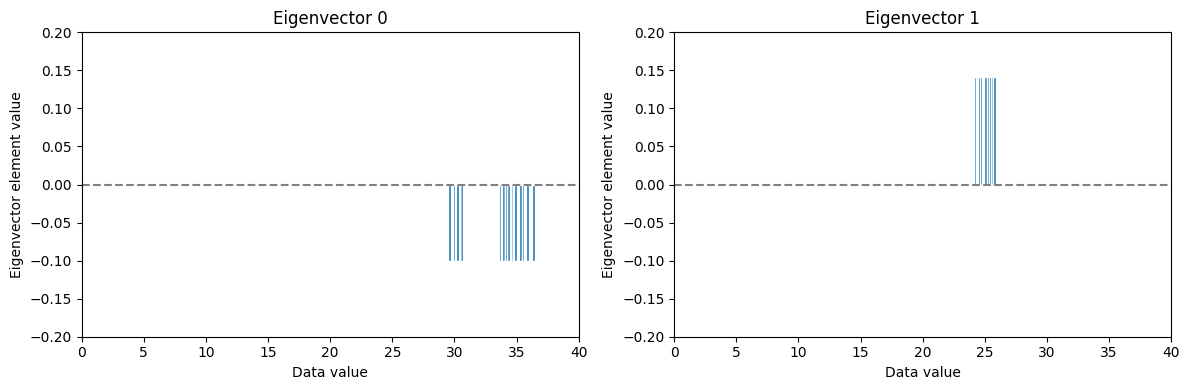

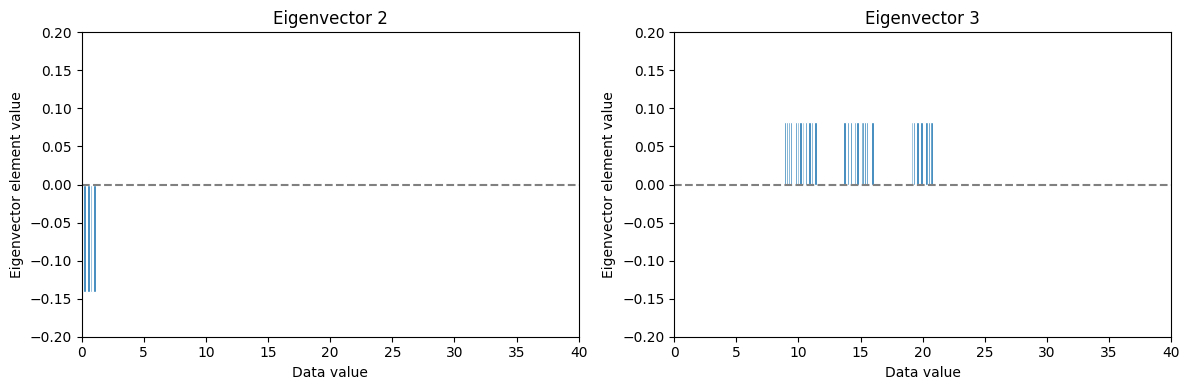

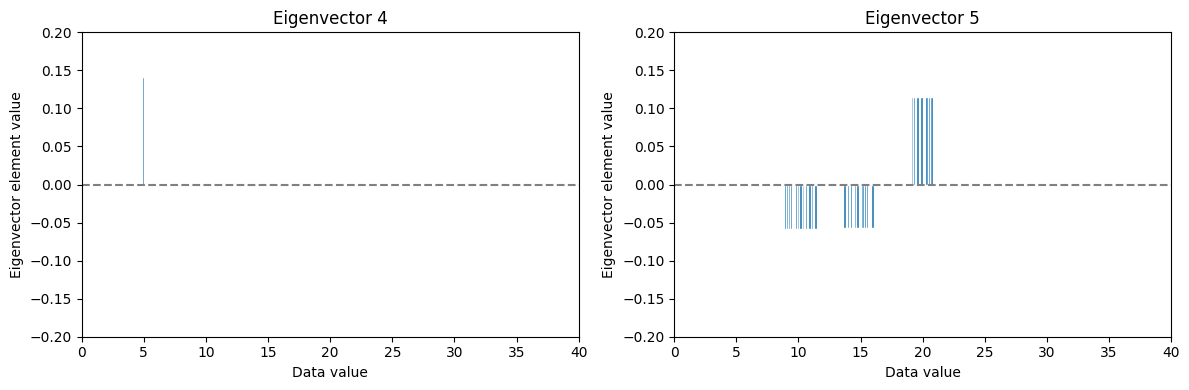

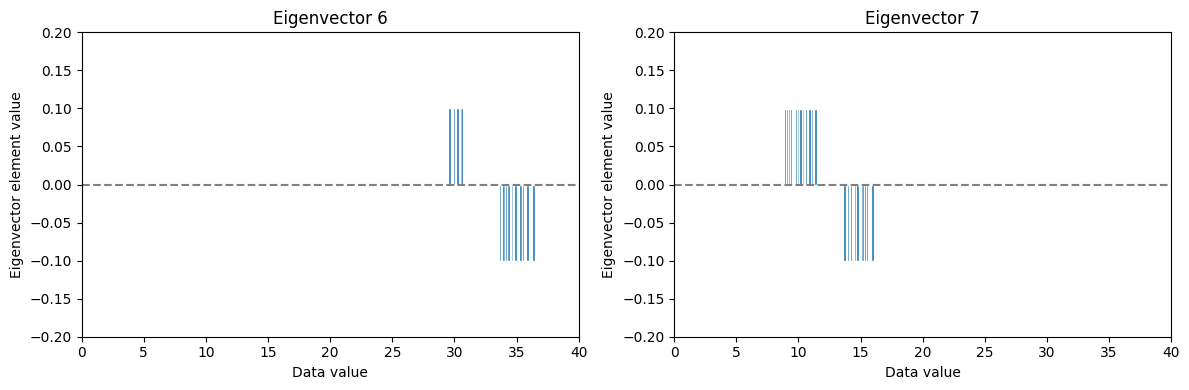

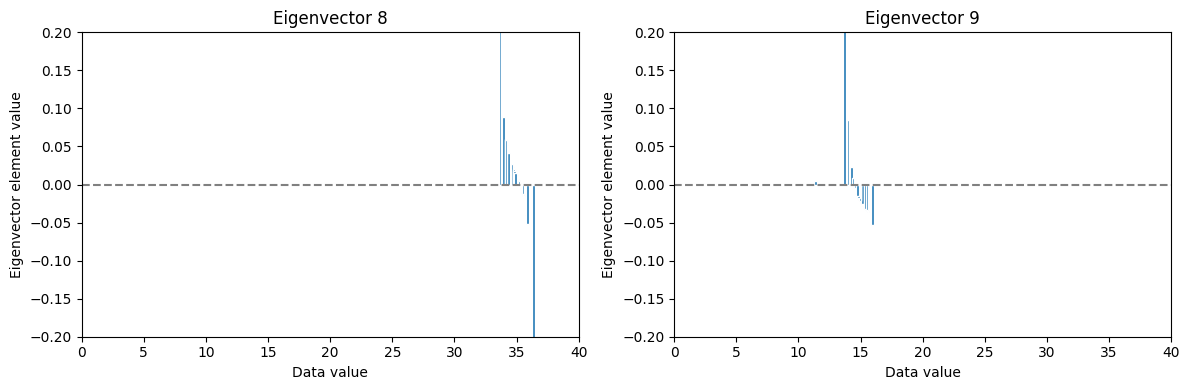

In [274]:
# eigenvector with a different x-axis
plots_per_row = 2
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(12, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[:,run_number-1]
        axes[col].bar(x, temp_vector, edgecolor='white', width=0.2)
        axes[col].axhline(y=0, color='gray', linestyle='--')
        # axes[col].bar(range(len(temp_vector)), temp_vector)
        axes[col].set_xlim(0,40)
        axes[col].set_ylim(-0.2,0.2)
        axes[col].set_xlabel('Data value')
        axes[col].set_ylabel('Eigenvector element value')
        axes[col].set_title(f'Eigenvector {run_number-1}')
        
    fig.savefig(f'figure/eigenVectors_{k}_{run_number}.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()